In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

def plot_distribs(ubi_array, x=250):
    # Set the figure size
    plt.figure(figsize=(18, 6))  # Width: 12 inches, Height: 6 inches
    colors = plt.cm.viridis(np.linspace(0, 1, len(ubi_array)))
    # Plot the bar chart
    for i, df in enumerate(ubi_array):
        df = df.drop(df[df['Income Range'].str.split('-').str[-1].astype(int) > x*1000].index)
        plt.bar(range(len(df)), df["Number of People"], color = colors[i] )
        
    # Set x-tick positions to every fifth element
    plt.xticks(np.arange(0, len(df), 5))

    tick_labels = [df["Income Range"].iloc[i] if i % 25 == 0 else '' for i in range(0,len(df),5)]
    plt.xticks(rotation=90)  # Rotate labels for better readability
    plt.gca().set_xticklabels(tick_labels)

    # Add labels and title
    plt.xlabel('Income Range, Thousands')
    plt.ylabel('Number of People')
    plt.title('Frequency Chart of Income Distribution')

    # Show plot
    plt.show()


In [21]:
#Choose number of periods to model
I = 5

In [3]:
import numpy as np
import pandas as pd

# Desired mean and mode (peak)
mean_X = 50000  # Desired mean
mode_X = 25000  # Desired mode (peak)
pop = 1*(10**3)

# Calculate parameters for the log-normal distribution
sigma_log = np.sqrt(np.log(1 + ((mode_X / mean_X)**2)))
mu_log = np.log(mean_X) - (0.5 * sigma_log**2)

# Generate random numbers following a log-normal distribution
random_numbers = np.random.lognormal(mu_log, sigma_log, pop)

# Define income range increments
income_increments = np.arange(0, max(random_numbers) + 1000, 1000)

# Create frequency table using NumPy's histogram function
frequencies, bins = np.histogram(random_numbers, bins=income_increments)

# Create a DataFrame from the frequency table
frequency_df = pd.DataFrame({'Income Range': [f'${int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins) - 1)],
                             'Number of People': frequencies})


In [4]:
len(frequency_df)

234

In [5]:
import numpy as np


def concave_function(x):
    return 1.5 * np.sqrt(x / 150000)

# Test the function with x = 0 and x = 150000


In [36]:
data = pd.DataFrame({'lab_income_1': random_numbers})


def gen_period_i(data = data, i = 1, tax = 0.2, r = 0.2, s=0.2, a =0.4):
    covered_columns = []
    for x in range(1, i+1, 1): 
        data['capital_1'] = concave_function(data['lab_income_1'])*data['lab_income_1']
        data['inv_income_' + str(x)] = r * data['capital_' + str(x)]
        data['income_' + str(x)] = data['lab_income_' + str(x)] + data['inv_income_' + str(x)]
        data['category_1'] = pd.cut(data['lab_income_1'], bins=bins, labels=frequency_df['Income Range'])
        data['tax_' + str(x)] = (data['income_' + str(x)] + data['inv_income_' + str(x)])* tax
        data['ubi_amount_' + str(x)] = (0.4 * sum(data['tax_' + str(x)]))/pop
        data['net_transfer_' + str(x)] = data['ubi_amount_' + str(x)] - data['tax_' + str(x)]
        data['disposable_income_' + str(x)] = (data['income_' + str(x)] + data['net_transfer_' + str(x)] + data['inv_income_' + str(x)])
        data['income_to_spend_' + str(x)] = (s-1)*data['disposable_income_' + str(x)]
        data['inv_' + str(x)] = (s)*data['disposable_income_' + str(x)]
        
        for col in data.columns:
            if col not in ['category_' + str(y) for y in range(1, i+2)] and col != 'lab_income_' + str(x+1) and col not in covered_columns:
                #print(col + ' BEING REVIEWED')
                cat_col = (col[:-2] + '_category_' + str(x))
                data[cat_col] = pd.cut(data[col], bins=bins, labels=frequency_df['Income Range'])
                covered_columns.append(col)
                covered_columns.append(cat_col)
                #print(covered_columns)
                #print(cat_col + ' added')
                        
        data['capital_' + str(x+1)] = data['capital_' + str(x)] + data['inv_' + str(x)] 
        # Capital investment domestically also improves labour productivity. Total return on investment is a times larger than r, which is the return to capital. a is the proportion that accumulates to capital 
        #accross the whole stream of production, and 1-a is the share that utlimately goes to labour. I.e. a is the capital share of income.
        data['lab_income_' + str(x+1)] = data['lab_income_' + str(x)] + ((1-a)/a)*(r)*data['capital_' + str(x+1)]
        
        #Categorisations
        #data['category_' + str(x+1)] = pd.cut(data['lab_income_' + str(x+1)], bins=bins, labels=frequency_df['Income Range'])
        
                
        
        
    return data
# Display the DataFrame
data = gen_period_i(i=I)
data.head()['inv_income_category_1']


0    $10000-11000
1      $2000-3000
2      $4000-5000
3    $40000-41000
4    $18000-19000
Name: inv_income_category_1, dtype: category
Categories (234, object): ['$0-1000' < '$1000-2000' < '$2000-3000' < '$3000-4000' ... '$230000-231000' < '$231000-232000' < '$232000-233000' < '$233000-234000']

In [41]:
print(", ".join(data.columns))

lab_income_1, capital_1, inv_income_1, income_1, category_1, tax_1, ubi_amount_1, net_transfer_1, disposable_income_1, income_to_spend_1, inv_1, lab_income_category_1, capital_category_1, inv_income_category_1, income_category_1, tax_category_1, ubi_amount_category_1, net_transfer_category_1, disposable_income_category_1, income_to_spend_category_1, inv_category_1, capital_2, lab_income_2, inv_income_2, income_2, tax_2, ubi_amount_2, net_transfer_2, disposable_income_2, income_to_spend_2, inv_2, capital_category_2, lab_income_category_2, inv_income_category_2, income_category_2, tax_category_2, ubi_amount_category_2, net_transfer_category_2, disposable_income_category_2, income_to_spend_category_2, inv_category_2, capital_3, lab_income_3, inv_income_3, income_3, tax_3, ubi_amount_3, net_transfer_3, disposable_income_3, income_to_spend_3, inv_3, capital_category_3, lab_income_category_3, inv_income_category_3, income_category_3, tax_category_3, ubi_amount_category_3, net_transfer_catego

In [8]:
data.head()

,lab_income_1,capital_1,inv_income_1,income_1,category_1,tax_1,ubi_amount_1,net_transfer_1,disposable_income_1,income_to_spend_1,...,inv_income_category_5,income_category_5,tax_category_5,ubi_amount_category_5,net_transfer_category_5,disposable_income_category_5,income_to_spend_category_5,inv_category_5,capital_6,lab_income_6
0,57743.943849,53740.944279,10748.188856,68492.132704,$57000-58000,15848.064312,5419.285841,-10428.778471,68811.543089,-55049.234471,...,$28000-29000,$207000-208000,$47000-48000,$16000-17000,NaN,$204000-205000,NaN,$40000-41000,181987.542033,233553.717405
1,22762.589084,13300.810844,2660.162169,25422.751253,$22000-23000,5616.582684,5419.285841,-197.296843,27885.616578,-22308.493263,...,$9000-10000,$70000-71000,$16000-17000,$16000-17000,$0-1000,$80000-81000,NaN,$16000-17000,63769.429060,80315.047140
2,34068.116379,24353.860428,4870.772086,38938.888465,$34000-35000,8761.932110,5419.285841,-3342.646269,40467.014281,-32373.611425,...,$14000-15000,$110000-111000,$25000-26000,$16000-17000,NaN,$116000-117000,NaN,$23000-24000,97975.988119,125468.613065
3,140524.186407,204019.767747,40803.953549,181328.139957,$140000-141000,44426.418701,5419.285841,-39007.132860,183124.960646,-146499.968517,...,$90000-91000,NaN,$144000-145000,$16000-17000,NaN,NaN,NaN,$119000-120000,569999.395342,714484.712917
4,83318.348266,93144.369471,18628.873894,101947.222160,$83000-84000,24115.219211,5419.285841,-18695.933370,101880.162685,-81504.130148,...,$45000-46000,NaN,$74000-75000,$16000-17000,NaN,NaN,NaN,$62000-63000,287928.928002,366908.979237


In [9]:
def make_groups_1(data, x = 1):
    columns = [('capital_' + str(x)),('inv_income_' + str(x))]
    grouped = data.groupby('category_' + str(x))
    grouped_df = grouped[columns].agg(np.mean)
    return(grouped_df)



In [50]:
pd.set_option("display.max_rows", 10) 

In [51]:
def make_groups(data, x =1, coltypes = ['lab_income_', 'inv_income_']):
    columns = [(col + str(x)) for col in coltypes]
    grouped_df = data.pivot_table(values = columns, index = 'income_category_' + str(x), aggfunc = sum)
    return(grouped_df)
    
    
make_groups(data).iloc[100:700]

,inv_income_1,lab_income_1
income_category_1,,
$100000-101000,91581.035356,411916.752295
$101000-102000,55651.718529,249253.629198
$102000-103000,56151.291982,250743.034265
$103000-104000,75917.889743,337441.096283
$104000-105000,38763.352927,171096.238619
...,...,...
$229000-230000,0.000000,0.000000
$230000-231000,0.000000,0.000000
$231000-232000,0.000000,0.000000


In [55]:
def gen_ubi_array(data=data, i=1, coltypes = ['lab_income_', 'inv_income_']):
    ubi_array = []
    for x in range(1, i + 1):  # Corrected the range to include i
        grouped_df = make_groups(data, x=x, coltypes = coltypes).reset_index()
        ubi_array.append(grouped_df)
    return ubi_array
        
        
gen_ubi_array(i = I, coltypes = ['lab_income_', 'inv_income_', 'net_transfer_'])[1]

,income_category_2,inv_income_2,lab_income_2,net_transfer_2
0,$0-1000,0.000000,0.000000,0.000000
1,$1000-2000,0.000000,0.000000,0.000000
2,$2000-3000,0.000000,0.000000,0.000000
3,$3000-4000,0.000000,0.000000,0.000000
4,$4000-5000,0.000000,0.000000,0.000000
...,...,...,...,...
229,$229000-230000,0.000000,0.000000,0.000000
230,$230000-231000,0.000000,0.000000,0.000000
231,$231000-232000,41614.569883,189490.822331,-47351.047334
232,$232000-233000,0.000000,0.000000,0.000000


In [69]:
UBI = gen_ubi_array(i = I, coltypes = ['net_transfer_'])

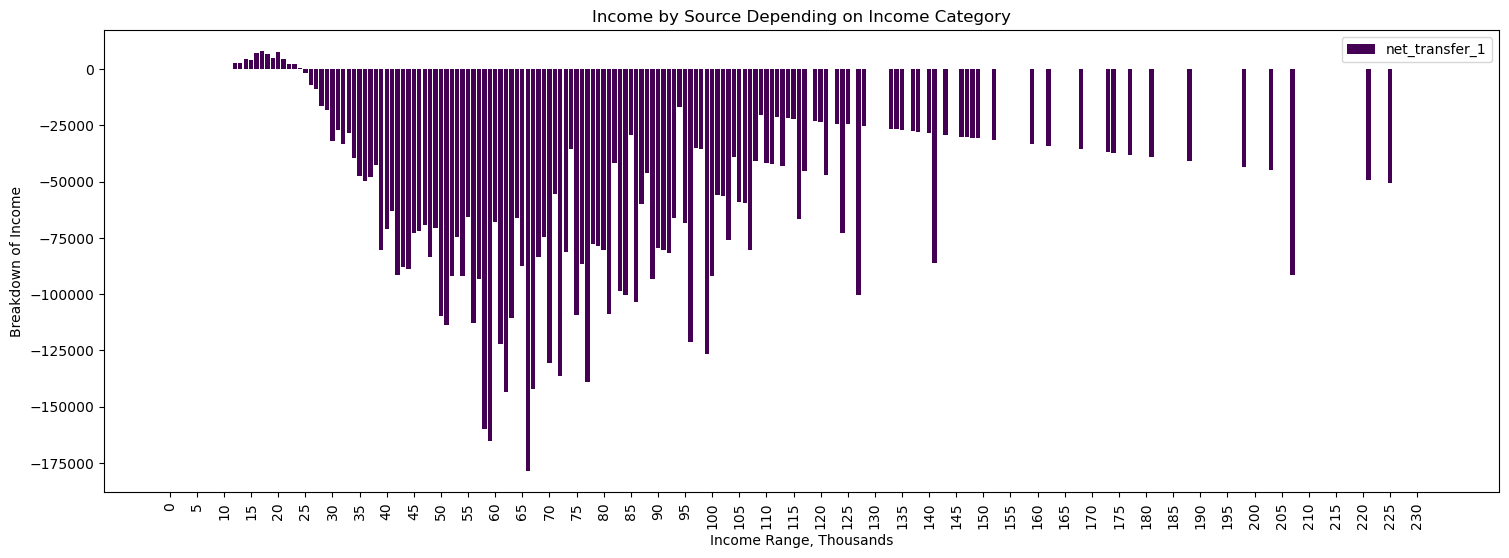

In [70]:
def plot_ubi(ubi, x=250, i = 0, coltype = 'income_category'):
        # Set the figure size
        plt.figure(figsize=(18, 6))  # Width: 12 inches, Height: 6 inches
        
        df = ubi
        df = df.drop(df[df[coltype + '_' + str(i+1)].str.split('-').str[-1].astype(int) > x*1000].index)
        bottom = None
        num_bars = len(ubi.columns[1:])
        colors = plt.cm.viridis(np.linspace(0, 1, num_bars))  # Generate a range of colors from yellow to red
        nth_bar = 0
        for n, col in enumerate(df.columns[1:]):
                if n == 0:
                    plt.bar(range(len(df)), df[col], color=colors[nth_bar], label=str(col))  # Use color from the gradient
                    bottom = df[col]  # Update the bottom values for subsequent sets of bars
                    nth_bar += 1
                else:
                    plt.bar(range(len(df)), df[col], bottom=bottom, color=colors[nth_bar], label=str(col))  # Use color from the gradient
                    bottom += df[col]  # Update the bottom values for subsequent sets of bars
                    nth_bar += 1

        # Set x-tick positions to every fifth element
        plt.xticks(np.arange(0, len(df), 5))


        #tick_labels = [df["Income Range"].iloc[i] if i % 25 == 0 else '' for i in range(0,len(df),5)]
        plt.xticks(rotation=90)  # Rotate labels for better readability
        #plt.gca().set_xticklabels(tick_labels)

        # Add labels and title
        plt.xlabel('Income Range, Thousands')
        plt.ylabel('Breakdown of Income')
        plt.title('Income by Source Depending on Income Category')
        plt.legend()

        # Show plot
        plt.show()
    
plot_ubi(ubi = UBI[0])

5


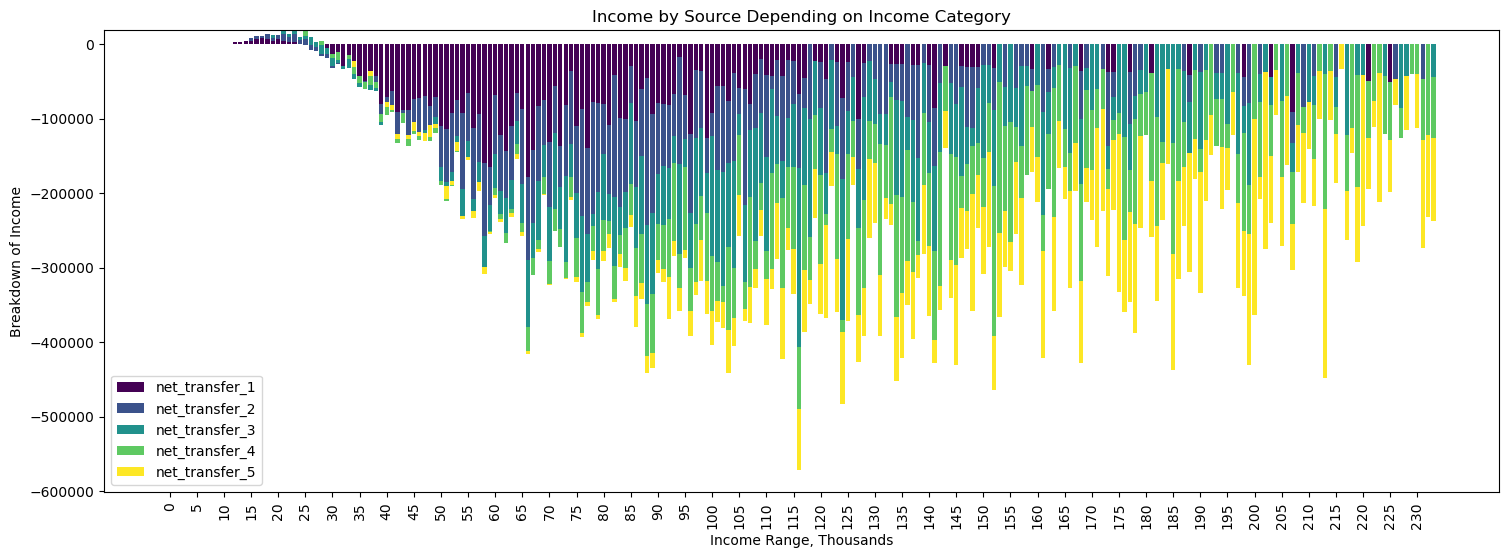

In [71]:
import numpy as np

def plot_ubis(ubi_array, separate=True, x=250, coltype = 'income_category'):
    if separate:
        for i, df in enumerate(ubi_array):
            plot_ubi(df, i=i)
    else:
        plt.figure(figsize=(18, 6))
        bottom = None
        num_bars = len(ubi_array) * len(ubi_array[0].columns[1:])
        print(num_bars)
        colors = plt.cm.viridis(np.linspace(0, 1, num_bars))  # Generate a range of colors from yellow to red
        nth_bar = 0
        for i, df in enumerate(ubi_array):
            df = df.drop(df[df[coltype + '_' + str(i + 1)].str.split('-').str[-1].astype(int) > x * 1000].index)
            for n, col in enumerate(df.columns[1:]):
                if n == 0:
                    if i == 0:
                        plt.bar(range(len(df)), df[col], color=colors[nth_bar], label=str(col))  # Use color from the gradient
                        bottom = df[col]  # Update the bottom values for subsequent sets of bars
                    else:
                        plt.bar(range(len(df)), df[col], bottom=bottom, color=colors[nth_bar], label=str(col))  # Use color from the gradient
                        bottom += df[col]  # Update the bottom values for subsequent sets of bars
                    nth_bar += 1
                else:
                    plt.bar(range(len(df)), df[col], bottom=bottom, color=colors[nth_bar], label=str(col))  # Use color from the gradient
                    bottom += df[col]  # Update the bottom values for subsequent sets of bars
                    nth_bar += 1
        
        plt.xticks(np.arange(0, len(df), 5))
        plt.xticks(rotation=90)
        plt.xlabel('Income Range, Thousands')
        plt.ylabel('Breakdown of Income')
        plt.title('Income by Source Depending on Income Category')
        plt.legend()
        plt.show()

# Assuming x is defined elsewhere in your code
plot_ubis(UBI, separate=False)


In [87]:
gov_rev = np.zeros(I)
import pandas as pd
import numpy as np

def summary_stats(data = data, cols=['tax', 'income', 'inv_income', 'lab_income'], periods=I, aggfunc = 'sum'):
    # Create an empty DataFrame to store the summary stats
    col_df = pd.DataFrame(index=range(periods), columns=cols)
    if aggfunc == 'mean':
        for col in cols:
            for i in range(periods):
            # Calculate the sum of the column for each period and store it in the DataFrame
                col_df.at[i, col] = data[col + '_' + str(i+1)].mean()
    else:
        for col in cols:
            for i in range(periods):
                # Calculate the sum of the column for each period and store it in the DataFrame
                col_df.at[i, col] = data[col + '_' + str(i+1)].sum()

    return col_df

# Assuming 'data' and 'I' are defined elsewhere in your code
summary_data = summary_stats(cols = ['tax', 'ubi_amount'], aggfunc = 'mean')
print(summary_data)


            tax    ubi_amount
0  13548.214603   5419.285841
1  17982.362714   7192.945086
2  23678.143604   9471.257442
3  31025.113451   12410.04538
4  40527.435965  16210.974386


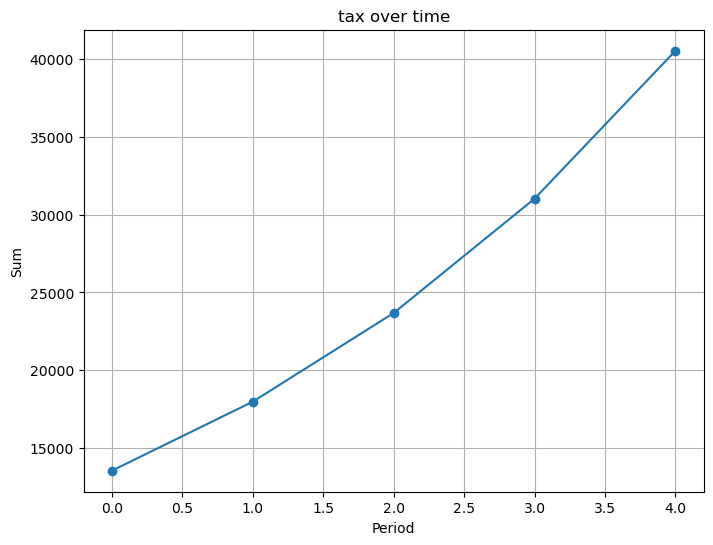

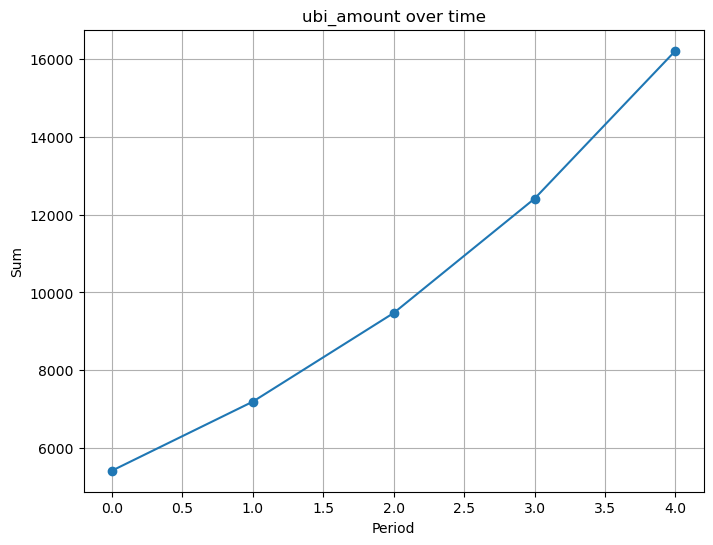

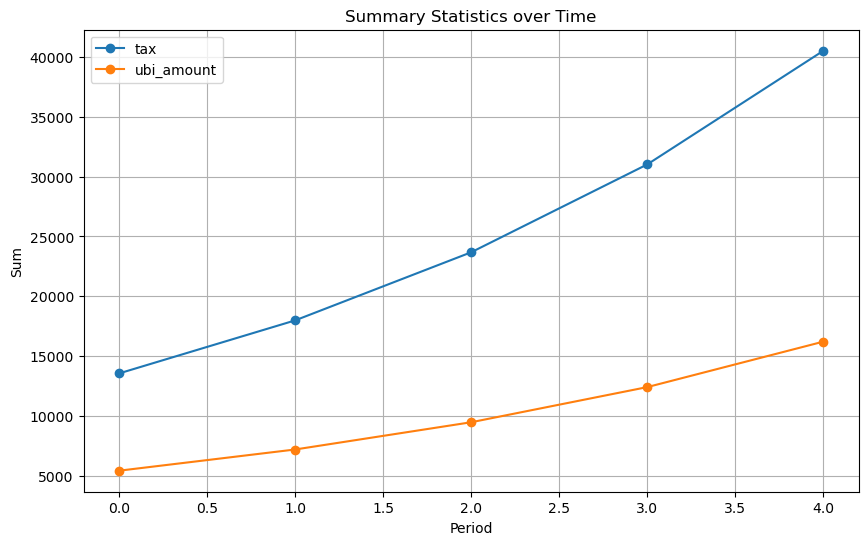

In [88]:
import matplotlib.pyplot as plt

def plot_summary_stats(summary_data):
    # Plot each column separately
    for col in summary_data.columns:
        plt.figure(figsize=(8, 6))
        plt.plot(summary_data.index, summary_data[col], marker='o', linestyle='-')
        plt.title(col + ' over time')
        plt.xlabel('Period')
        plt.ylabel('Sum')
        plt.grid(True)
        plt.show()

    # Plot all columns together on one subplot
    plt.figure(figsize=(10, 6))
    for col in summary_data.columns:
        plt.plot(summary_data.index, summary_data[col], marker='o', linestyle='-', label=col)
    plt.title('Summary Statistics over Time')
    plt.xlabel('Period')
    plt.ylabel('Sum')
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming 'summary_data' DataFrame is obtained from the previous step
plot_summary_stats(summary_data)


In [22]:
def make_freq_table(coltype = 'income_category_', i = 1):
    ubi = data[str(coltype) + '_' + str(i)].value_counts().reset_index()
    ubi.columns = ['Income Range', 'Number of People']

    # Sort the frequency table by income range
    ubi = ubi.sort_values(by='Income Range')
    # Display the frequency table
    return(ubi)

In [ ]:
for i in [1,2]:#
    print(data['income_category_' + str(i)].value_counts().reset_index())

In [ ]:
ubi1 = make_freq_table(1)
ubi2 = make_freq_table(2)
ubi3 = make_freq_table(3)
ubi4 = make_freq_table(4)
ubi5 = make_freq_table(5)

In [23]:
def ubi_multiple(data = data, i=1, coltype = 'income_category'):
    ubi_multiple = []
    print(ubi_multiple)
    for x in range(0,i):
        ubi_multiple.append(make_freq_table(i = x+1, coltype = coltype))
        
    return ubi_multiple
#ubi_multiple(i=5)

[]


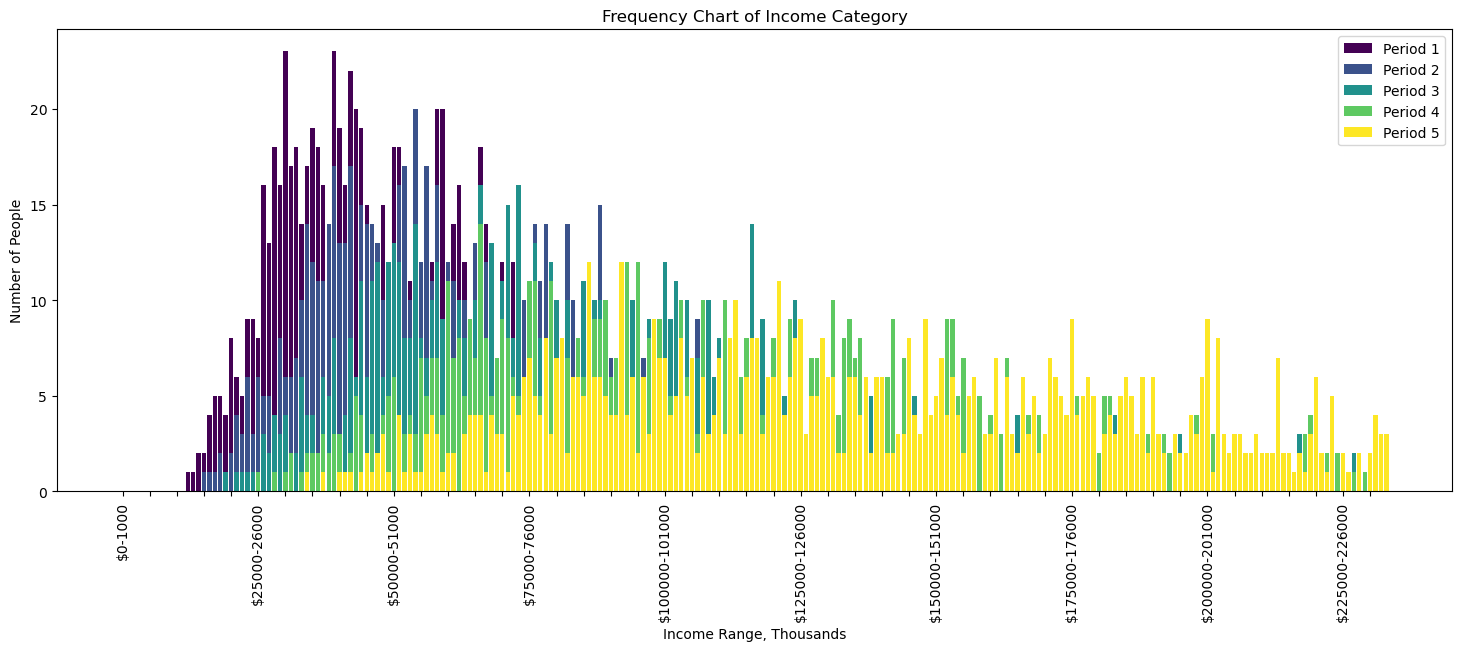

In [28]:
def plot_distribs(ubi_array, x=250, coltype = 'income_category'):
    # Set the figure size
    plt.figure(figsize=(18, 6))  # Width: 12 inches, Height: 6 inches
    colors = plt.cm.viridis(np.linspace(0, 1, len(ubi_array)))
    # Plot the bar chart
    for i, df in enumerate(ubi_array):
        df = df.drop(df[df['Income Range'].str.split('-').str[-1].astype(int) > x*1000].index)
        plt.bar(range(len(df)), df["Number of People"], color = colors[i], label = 'Period ' + str(i+1))
        
    # Set x-tick positions to every fifth element
    plt.xticks(np.arange(0, len(df), 5))

    tick_labels = [df["Income Range"].iloc[i] if i % 25 == 0 else '' for i in range(0,len(df),5)]
    plt.xticks(rotation=90)  # Rotate labels for better readability
    plt.gca().set_xticklabels(tick_labels)

    # Add labels and title
    plt.xlabel('Income Range, Thousands')
    plt.ylabel('Number of People')
    plt.title('Frequency Chart of ' + coltype.replace('_',' ').title())
    plt.legend()

    # Show plot
    plt.show()

plot_distribs(ubi_multiple(i=I))

[]


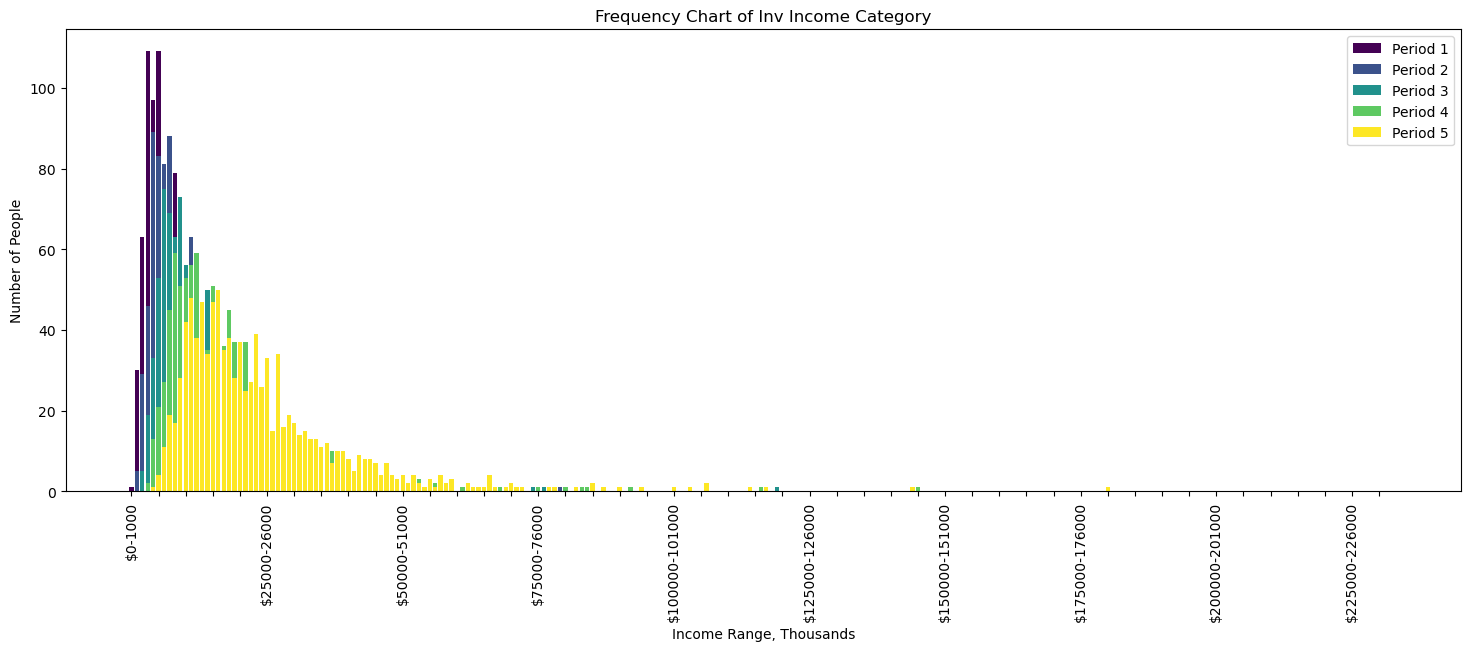

[]


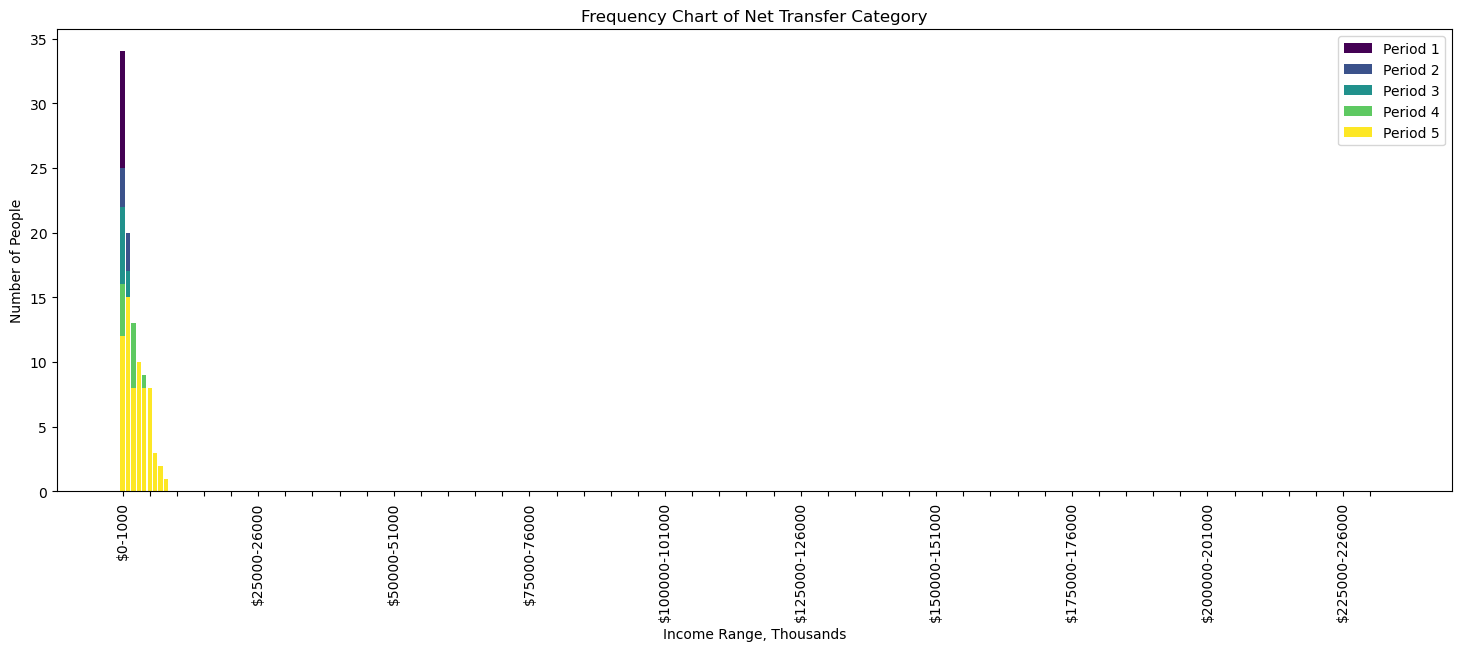

[]


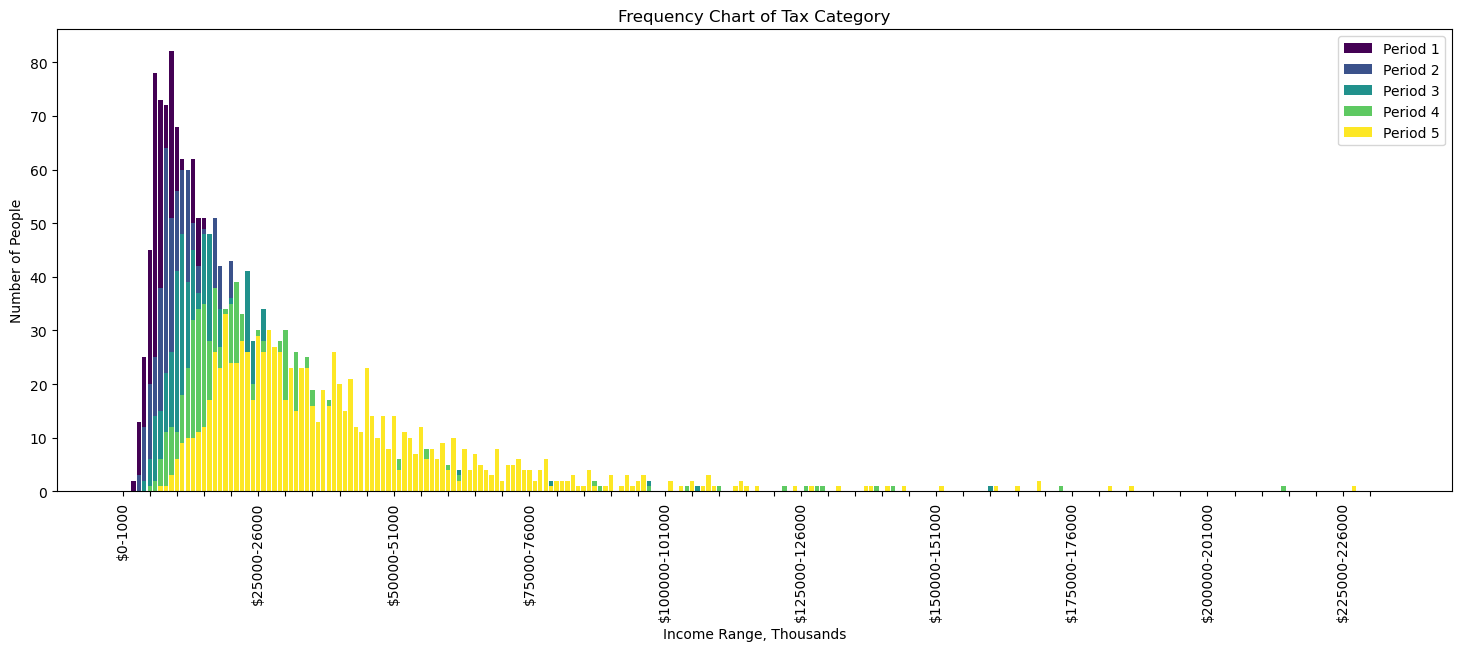

In [42]:
cols_list = ['inv_income_category','net_transfer_category', 'tax_category']
for coltype in cols_list:
    plot_distribs(ubi_multiple(i=I, coltype = coltype),coltype = coltype)

[]


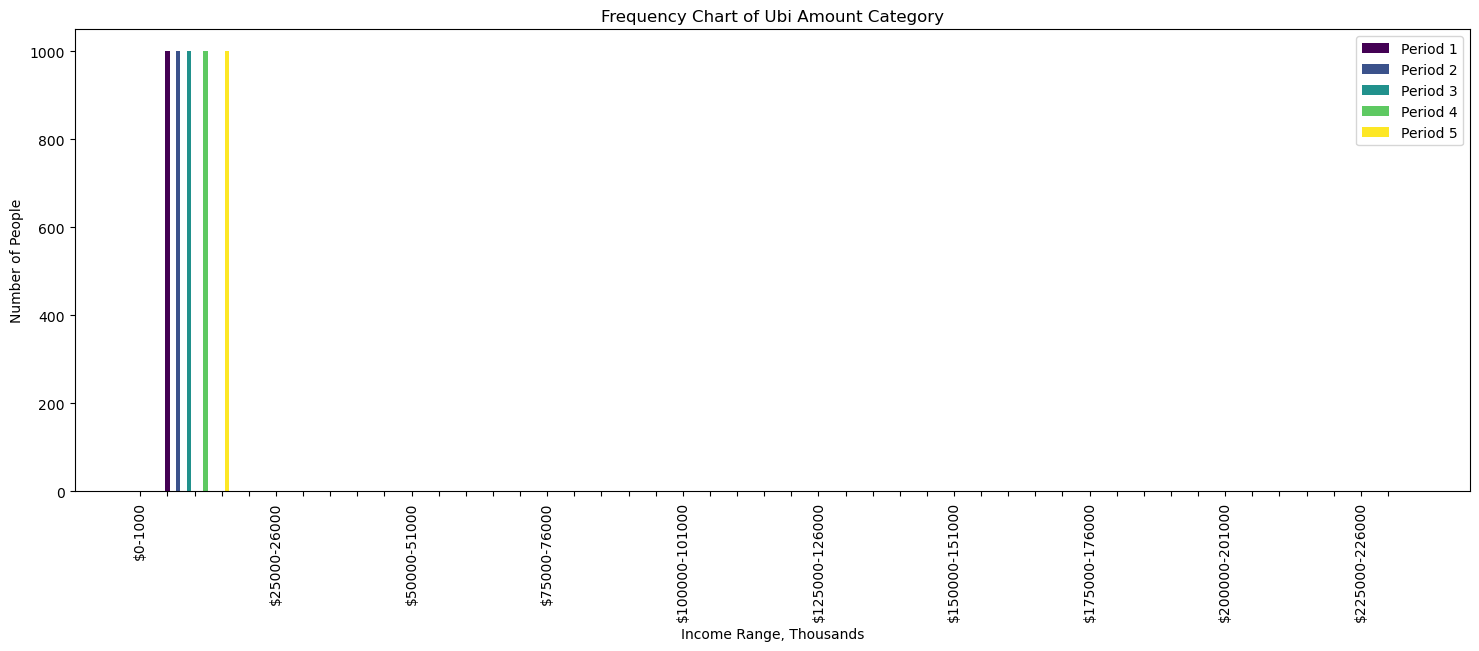

In [45]:
cols_list = ['ubi_amount_category']
for coltype in cols_list:
    plot_distribs(ubi_multiple(i=I, coltype = coltype),coltype = coltype)